<a href="https://colab.research.google.com/github/scottspurlock/csc4422-s2024/blob/main/demos/day12_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DMML Day 12

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


In [ ]:
# Iris data
file_link = 'https://drive.google.com/uc?export=download&id=1UZTj2GjSTFiBqAeOXiroTxviy_zLxLpL'
df = pd.read_csv(file_link)

# Separate out the data (X) and labels (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']


In [ ]:
# Let's make some imbalanced data by setting the first two kinds of
# irises to be class 0 and the last kind to be class 1.
ord_map = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica':2
}
y = y.map(ord_map)
y


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=13)

model = XGBClassifier(n_estimators=1, max_depth=300, learning_rate=0.001)
model.fit(Xtrain, ytrain)

# make predictions for test data
ypred = model.predict(Xtest)

# evaluate predictions
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy*100:.2f}%')



Accuracy: 100.00%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Which hyperparameters do we want to try?
param_grid = {'n_estimators': np.arange(1, 102, 20),
              'max_depth': np.arange(1, 18, 4),
              'learning_rate': np.arange(0.1, 1.2, .2)}

# We can incorporate cross-validation into the grid search by
# specifying cv=5.
grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, verbose=2, scoring='accuracy')

# We'll use just the training data, so that we can evaluate the best
# model against data that was unseen during training.
grid.fit(Xtrain, ytrain)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=21; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=21; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=21; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=21; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=21; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n_estimators=41; total time=   0.0s
[CV] END ....learning_rate=0.1, max_depth=1, n

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1]),
                         'max_depth': array([ 1,  5,  9, 13, 17]),
                         'n_estimators': array([  1,  21,  41,  61,  81, 101])},
             scoring='accuracy', verbose=2)

In [ ]:
# after the grid search, we can see the best hyperparameters
print(grid.best_params_)

# # and the best accuracy
print(grid.best_score_)



{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1}
0.9375494071146244


In [ ]:
# then we can train the final model with the best hyperparameters
model = XGBClassifier(n_estimators=1, max_depth=5, learning_rate=0.1)
model.fit(Xtrain, ytrain)

# predict the test data to see how well the model generalizes
ypred = model.predict(Xtest)
accuracy = accuracy_score(ytest, ypred)
print(accuracy)


1.0


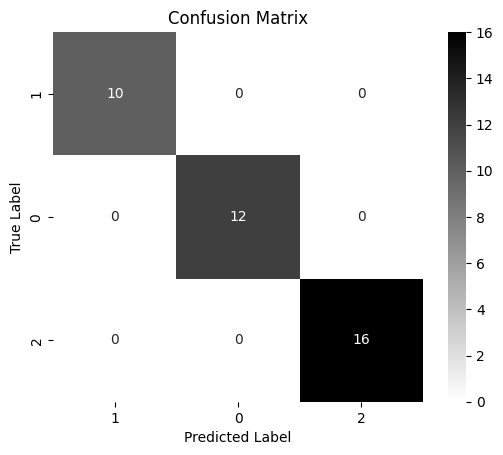

In [ ]:
labels = ytrain.unique()
cm = confusion_matrix(ytest, ypred, labels=labels)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                    cmap="gray_r",
                    xticklabels=labels,
                    yticklabels=labels)

plt.xlabel('Predicted Label');
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
